# Statistics 2550 Homework 6 (pt. B)
### Hayden Copenhafer U1113702

In [65]:
#boilerplate
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
from scipy.stats import ttest_ind #t-test tool from scipy's stats package
import numpy as np, statsmodels.stats.api as sms #confidence interval tool and numpy (math package)

### B1)

In [66]:
cat1=[57.9,66.2,65.4,65.4,65.2,62.6,67.6,63.7,67.2,71] #list of catalyst #1 values
cat2=[66.4,71.7,70.3,69.3,64.8,69.6,68.6,69.4,64.3,68.8]
t,p=ttest_ind(cat1,cat2) #function finds t stat and p val by differencing the means of the two catalysts
print(f"t-statistic:{t}") #show the t stat and p value with the preceding text
print(f"p-value:{p}")

CI95=sms.CompareMeans(sms.DescrStatsW(cat1), sms.DescrStatsW(cat2)) #find a 95% CI for difference in means using numpy pkg.
print("95% CI for difference in means:",CI95.tconfint_diff(usevar='unequal')) #show the calc'd values

t-statistic:-2.33647692462588
p-value:0.031228821858937418
95% CI for difference in means: (-5.911852030252856, -0.2881479697471616)


a)

Our t test indicated a t statistic of -2.336 a p value of 0.031. Our selected value for $\alpha$ is 0.05; so ince p< $\alpha$, we can reject H_0. This means that there most likely exists a real difference between the effective concentration of catalyst 1 and catalyst 2.

b)

There is strong evidence that the mean effective concentration does differ between catalysts. Since our 95% confidence interval for the difference in means is entirely negative, this means that we can be 95% certain that catalyst 1 can be used in lowe concentrations that catalyst 2. Additionally, our low p value of 3.1% indicates a low probability of these results being down to chance rather than an actual difference between catalysts.

In [67]:
""""The formula we will be using is: δ=(T+Z)*SE. SE is the square root of the sum of each standard deviation squared 
divided by n. Once we solve for T, we can use the Z tables to find the power."""

Z=1.96 #Z for a 95% CI
δ=5 #effect size
stdev1=np.std(cat1) #standard deviations for each catalyst's tests
stdev2=np.std(cat2)
SE=np.sqrt(stdev1**2/len(cat1)+stdev2**2/len(cat2)) #standard error (n is the length of each list)
T=(δ/SE)-Z #rearrange to solve for T*
print(T)

2.012359560345888


c)

When solving for the power, We get a value of T$^\star$ of 2.01 which corresponds to a p value of 0.9778. This means that we can be 95% confident that this study would accurately be able to detect a difference in catalyst concentrations of 5 grams 97.78% of the time.


d) 

No, the sample size used by the experimenter is insufficient if they care about a difference in 5 grams of catalyst. A sample size of 10 is not enough to establish a clean distribution and lends to a low power of the study. Because of the small sample size, we cannot reasonably assume normal distribution exists even if this is what was to be expected from the study.

### B2)

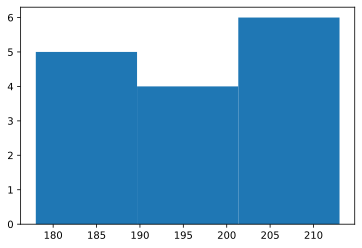

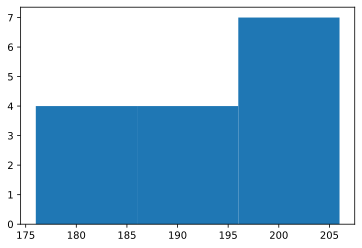

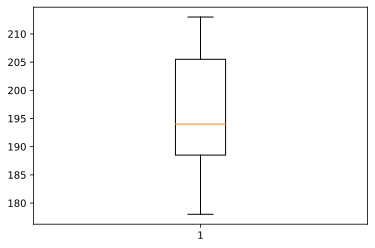

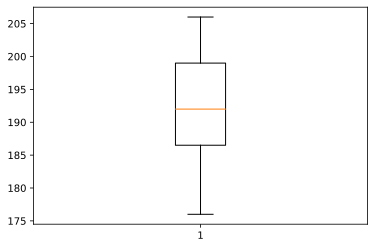

In [68]:
T1=[206, 188, 205, 187, 194, 193, 207, 185, 189, 213, 192, 210, 194, 178, 205] #type 1 deflection data
T2=[177, 197, 206, 201, 180, 176, 185, 200, 197, 192, 198, 188, 189, 203, 192] #type 2

plt.hist(T1,bins=3) #plot histograms with 3 bins since this reflects distribution most clearly
plt.show()

plt.hist(T2,bins=3)
plt.show()

plt.boxplot(T1) #create boxplots of data
plt.show()

plt.boxplot(T2)
plt.show()

a)

These plots do not provide evidence for equal variance since there are only 2 medians to compare. We would need a third dataset to compare the variance. There is also insufficient evidence for normality; since each sample size is relatively small, we can't begin to see any bell-curve characteristics begin to emerge regardless of the number of bins.

In [69]:
S1=np.std(T1) #calculate standard deviations of each list
S2=np.std(T2)
StdErr=np.sqrt(S1**2/len(T1)+S2**2/len(T2)) #use these to find standard error
Tscore=(np.mean(T1)-np.mean(T2))/StdErr #use standard error to calc a t score
df=len(T1)+len(T2)-2 #degrees of freedom is n1+n2-2
print('T-score:',Tscore, 'Degrees of Freedom:', df)

T-score: 1.231791338789801 Degrees of Freedom: 28


b)

We performed a difference in means T test for two samples to arrive at a T score of 1.23. With a 28 degrees of freedom and a two tailed approach (We care about a difference in either direction), we find a P-value of >20%. With an $\alpha$ cutoff of 5%, we must conclude that the study does not show a significant difference in pipe deflection temperatures.

In [70]:
"""δ=(T*+Z*)SE"""

Zstar=1.96 #from Z tables for a=0.05
Tstar=1.28 #from z tables for 1-B=0.9
δ=(Tstar+Zstar)*StdErr #formula for effect size
print(δ)

11.39803435685294


c)

With our current setup of a sample size of 15 for each pipe and setting a power of 90% and a $\alpha$ of 0.05, we find that we can detect up to an 11.39 degree difference in the temperature of deflection. This means that with these parameters and sample sizes, we would not be able to detect a defletion temperature of less than 5$^o$F. If we wanted to be able to detect these smaller differences, we would need larger sample sizes.

### B3)

In [71]:
Grind1=[242, 249, 235, 250, 254, 244, 258, 311, 237, 261, 314, 252] #create lists of grinding force data
Grind2=[302, 421, 419, 399, 317, 311, 350, 363, 392, 367, 301, 302]
print('Low vibration mean grinding force:',np.mean(Grind1), 'N  '
      'Low vibration mean grinding force:', np.mean(Grind2),'N') #find and print the means
print('The difference in mean grinding force is:',np.mean(Grind2)-np.mean(Grind1),'N') #find difference in means
ME1=1.96*np.std(Grind1)/np.sqrt(len(Grind1)) #find a margin of error for low vibrations
print('The margin of error for low vibrations is:',ME1,'N')

Low vibration mean grinding force: 258.9166666666667 N  Low vibration mean grinding force: 353.6666666666667 N
The difference in mean grinding force is: 94.75 N
The margin of error for low vibrations is: 14.20428844346612 N


a)

There is sufficient evidence that that mean grinding force increases at high vibration levels. The difference in means is 94.75 Newtons and the margin of error for a 95% confidence interval is only 14.2 Newtons meaning there is an extremely low likelihood of this large of a difference being due to pure chance.

In [72]:
#create formula for lower and upper bounds for difference in means 95% CI
DiffLo=(np.mean(Grind2)-np.mean(Grind1))-1.96*np.sqrt((np.std(Grind1)**2)/len(Grind1)+(np.std(Grind2)**2)/len(Grind2))
DiffHi=(np.mean(Grind2)-np.mean(Grind1))+1.96*np.sqrt((np.std(Grind1)**2)/len(Grind1)+(np.std(Grind2)**2)/len(Grind2))
print('(',DiffLo,',',DiffHi,')') #print values in parentheses and separated by a comma


( 65.78625914597254 , 123.71374085402746 )


b)

After creating a difference in means confidence interval, our results from part still seem convincing; a difference of means of 94.75 Newtons falls within our 95% confidence interval of (65.79, 123.71)N. Furthermore, our difference in means CI is entirely positive, meaning we can be at least 95% sure that a real increase in mean grinding force is caused by high vibration.

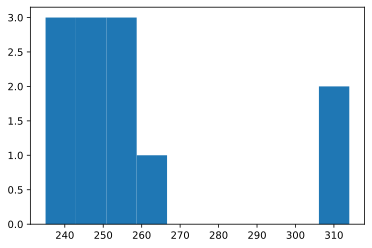

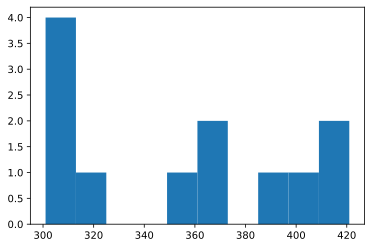

In [73]:
plt.hist(Grind1) #plot histograms of data. I let the package choose the number of bins
plt.show()
plt.hist(Grind2)
plt.show()


c)

Plotting histograms of our data reveals that the measurements taken do not follow a normal distribution, at least at the sample sizes tested. Because there seems to be data clustering and outliers, especially at the high vibrations, this could potentially pose as a violation of our hypothesis assumption of normality. However, because the highest outliers at low vibrations are only just above the lowest measurements at high vibrations, I would argue that the initial conclusion still stands.